In [293]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [294]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mean_absolute_error_ol(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred) )

In [381]:
#ads = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])
#iat = pd.read_csv('iat1.csv', index_col=['Time'], parse_dates=['Time'])
#ip02 = pd.read_csv('ip02_X.txt', index_col=['Time'], parse_dates=['Time'])
##iacut = pd.read_csv('iat1cut.txt', index_col=['Time'], parse_dates=['Time'])
#currency = pd.read_csv('currency.csv', index_col=['Time'], parse_dates=['Time'])

#iat = pd.read_csv('iat1_Y_2005.txt', index_col=['Time'], parse_dates=['Time'])
#iatcut2 = pd.read_csv('iat1cut2.txt', index_col=['Time'], parse_dates=['Time'])

iatcut2 = pd.read_csv('iat3_lon_sred.txt', index_col=['Time'], parse_dates=['Time'])
#iatcut2 = pd.read_csv('iat3_lon.txt', index_col=['Time'], parse_dates=['Time'])
#iatcut2

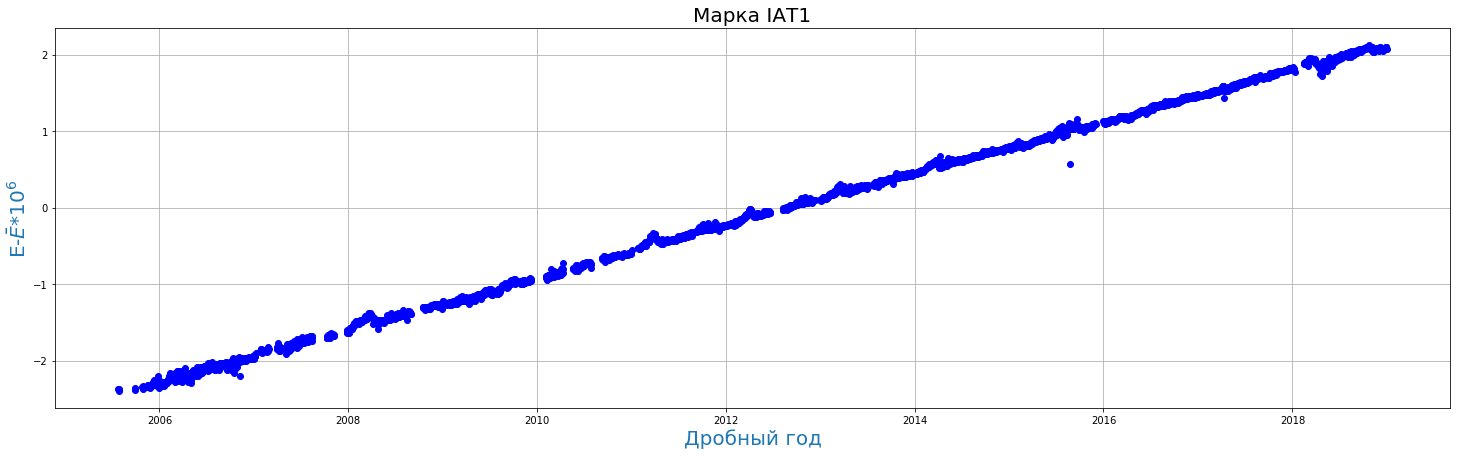

In [384]:
plt.figure(figsize=(25, 7))
plt.plot(iatcut2.N,'bo')
#plt.title('In-game currency spent (daily data)')
#plt.grid(True)
#plt.show()

#dd = iatcut2.N
#dd.head()
#dd.resample('W', how='mean')
#dd.diff(periods=1).dropna()
#plt.figure(figsize=(15, 7))
#plt.plot(dd,'r')
#plt.plot(iatcut2.N,'b')
#plt.legend(('phase field', 'level set', 'sharp interface'),
#           shadow=False, loc=(0.0, 0.48), fontsize=20)
#plt.xticks((-1, 0, 1), ('$-1$', r'$\pm 0$', '$+1$'), color='k', size=20)

# Left Y-axis labels, combine math mode and text mode
plt.ylabel(r'E-$\bar E$*$10^6$', {'color': 'C0', 'fontsize': 20})
plt.xlabel(r'Дробный год', {'color': 'C0', 'fontsize': 20})

plt.title('Марка IAT1',fontsize=20)

plt.grid(True)
plt.show()

In [387]:
def plotMovingAverage(series, window, plot_intervals=False, scale=3, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    #print(series)
                             # Скользящее среднее  тренд
    rolling_mean = series.rolling(window=window).mean()
    #print(rolling_mean)
    #rolling_mean = series.rolling(window=window).median()
    #print(rolling_mean)
    plt.figure(figsize=(15,10))
    plt.title("Скользящее среднее\n  размер окна = {}".format(window))
    plt.plot(rolling_mean, "b", label="Скользящее среднее")
   
    #plt.plot(series,'g',label="Serias window")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        #mae средний модуль отклонения = среднее обсалютное значение и скользящее среднее 
        #    ( |xi - yi| ) / n      (y-y'/n) из масива серии минус окно вычитаеться скользящее по окну
        # serias[окно до : конца] - Скользящее среднее  тренд               Yi - Ypred
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        
        deviation = np.std(series[window:] - rolling_mean[window:]) # стандартное отклонение - скользящ среднее std = y'-y
        rolling_std =  series.rolling(window).std() # Стандартное отклонение масива  с окном
        #a = np.std(series[window:])
        #print('tut   ',deviation)
        #print('deviation',deviation)
        lower_bond = rolling_mean - (mae + scale * deviation)
        #print('mae -',mae + scale * deviation)
        lower_2 = rolling_mean -        scale * rolling_std
        upper_2 = rolling_mean +        scale * rolling_std
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Верхняя граница/ нижняя доверительного интервала 99% ")
     #   plt.plot(upper_2, "b--", label="Upper 2")
        #plt.plot(lower_2, "b--", label="Lower 2")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            #print(anomalies)
            #anom = pd.DataFrame(series.index)
            #print(len(upper_bond))
            #Сравнение в панде [ серия < > чегота   ]
            #print(pd.DataFrame(series.index))
            #print(pd.DataFrame(series.columns))
            #print(series)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            #print(anomalies)
            #anomalies[series>upper_2] = series[series>upper_2]
            #anomalies[series<lower_2] = series[series<lower_2]
            #print(anomalies)
            plt.plot(anomalies, "ro", markersize=10,label = "Выбросы")
           
           # return anomalies
    plt.ylabel(r'E-$\bar E$*$10^6$', {'color': 'C0', 'fontsize': 20})
    plt.xlabel(r'Дробный год', {'color': 'C0', 'fontsize': 20})        
    plt.plot(series[window:],'y', label="Актуальные  значения")
    plt.legend(loc="upper left")
    plt.grid(True)

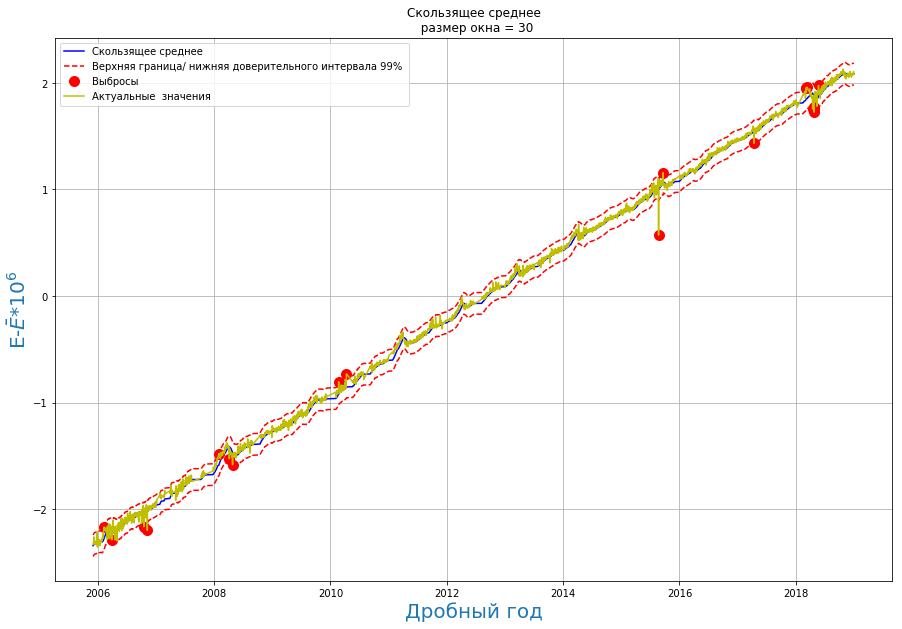

In [388]:
#plotMovingAverage(ip02, 2, plot_intervals=True, plot_anomalies=True)
plotMovingAverage(iatcut2,30, plot_intervals=True, plot_anomalies=True)


In [389]:
#ip02 = pd.read_csv('ip02_X.txt', index_col=['Time'], parse_dates=['Time'])
#iat1 = pd.read_csv('iat1.csv', index_col=['Time'], parse_dates=['Time'])
#iatcut = pd.read_csv('iat1cut2.txt', index_col=['Time'], parse_dates=['Time'])
#len(iatcut)

In [390]:
class HoltWinters:
    
    """
    Holt-Winters model with the anomalies detection using Brutlag method
    
    # series - initial time series
    # slen - length of a season      24*7  окно
    # alpha, beta, gamma - Holt-Winters model coefficients
    # n_preds - predictions horizon горизонт прогнозов
    # scaling_factor - sets the width of the confidence interval by Brutlag (usually takes values from 2 to 3)
    
    """
    
    
    def __init__(self, series, slen, alpha, beta, gamma, n_preds, scaling_factor=1.96):
        self.series = series
        self.slen = slen
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        self.n_preds = n_preds
        self.scaling_factor = scaling_factor  # 1.96 две сигмы три итд
        
        
    def initial_trend(self):
        sum = 0.0
        #print(sum)
        for i in range(self.slen):# 0 to  24
            sum += float(self.series[i+self.slen] - self.series[i]) / self.slen
            # sum += serias[i+окно] - serias[i]/ окно 
        return sum / self.slen  
    
    def initial_seasonal_components(self):
        seasonals = {}
        season_averages = []
        #print(self.slen)
        n_seasons = int(len(self.series)/self.slen)
       
        #print(n_seasons)
        # let's calculate season averages
        for j in range(n_seasons):
            season_averages.append(sum(self.series[self.slen*j:self.slen*j+self.slen])/float(self.slen))
        # let's calculate initial values
        for i in range(self.slen):
            sum_of_vals_over_avg = 0.0
            for j in range(n_seasons):
                sum_of_vals_over_avg += self.series[self.slen*j+i]-season_averages[j]
            #print(n_seasons)
            seasonals[i] = sum_of_vals_over_avg/n_seasons
        return seasonals   
    
   

    def triple_exponential_smoothing(self):
        self.result = []
        self.Smooth = []
        self.Season = []
        self.Trend = []
        self.PredictedDeviation = []
        self.UpperBond = []
        self.LowerBond = []
        
        seasonals = self.initial_seasonal_components()  #    Дастоем сезонность
        
        #                                            ОТ 0 до серии + предсказание  
        for i in range(len(self.series)+self.n_preds):
            if i == 0: # components initialization
                smooth = self.series[0]
                trend = self.initial_trend()   #    Дастоем тренд
                self.result.append(self.series[0])
                self.Smooth.append(smooth) # в пустой массив загоняем smooth
                self.Trend.append(trend)
                self.Season.append(seasonals[i%self.slen])
               # print(trend)
                self.PredictedDeviation.append(0) # видемо это будет метрика
                
                self.UpperBond.append(self.result[0] + self.scaling_factor * self.PredictedDeviation[0])
                #                      rolling_mean  -        scale        * rolling_std
                self.LowerBond.append(self.result[0] - self.scaling_factor * self.PredictedDeviation[0])
                continue
                
            if i >= len(self.series): # predicting
                m = i - len(self.series) + 1
                self.result.append((smooth + m*trend) + seasonals[i%self.slen])
                
                # when predicting we increase uncertainty on each step
                self.PredictedDeviation.append(self.PredictedDeviation[-1]*1.01) 
                #print(self.PredictedDeviation) 
            else:
                val = self.series[i]
                last_smooth, smooth = smooth, self.alpha*(val-seasonals[i%self.slen]) + (1-self.alpha)*(smooth+trend)
                trend = self.beta * (smooth-last_smooth) + (1-self.beta)*trend
                seasonals[i%self.slen] = self.gamma*(val-smooth) + (1-self.gamma)*seasonals[i%self.slen]
                
                self.result.append(smooth+trend+seasonals[i%self.slen])
                
                # Deviation is calculated according to Brutlag algorithm.
                self.PredictedDeviation.append(self.gamma * np.abs(self.series[i] - self.result[i]) 
                                               + (1-self.gamma)*self.PredictedDeviation[-1])
                  #гама * | serias | - (smooth+trend+seasonals[i%self.slen]) + (1-gama)*
            self.UpperBond.append(self.result[-1] + 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.LowerBond.append(self.result[-1] - 
                                  self.scaling_factor * 
                                  self.PredictedDeviation[-1])

            self.Smooth.append(smooth)
            self.Trend.append(trend)
            self.Season.append(seasonals[i%self.slen])

In [391]:
from sklearn.model_selection import TimeSeriesSplit # если сезонность наблюдаеться ежедневная то 24 часа

def timeseriesCVscore(params, series, loss_function=mean_squared_error, slen=45):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # errors array
    errors = []
    
    values = series.values
    alpha, beta, gamma = params
    
    # set the number of folds for cross-validation
    tscv = TimeSeriesSplit(n_splits=5) 
    
    # iterating over folds, train model on each, forecast and calculate error
    for train, test in tscv.split(values):

        model = HoltWinters(series=values[train], slen=slen, 
                            alpha=alpha, beta=beta, gamma=gamma, n_preds=len(test))
        model.triple_exponential_smoothing()
        
        predictions = model.result[-len(test):]
        actual = values[test]
        error = loss_function(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [392]:
%%time
#data = ip02.Z[:-2] # leave some data for testing
data = iatcut2.N[:-20] # leave some data for testing
#data = iatcut.N[:-20] # данные для тестирования
#print(data)
# initializing model parameters alpha, beta and gamma
x = [0, 0, 0] 

# Minimizing the loss function функция минимизации параметров
opt = minimize(timeseriesCVscore, x0=x, 
               args=(data, mean_squared_error), 
               #args=(data, mean_squared_log_error), 
               method="TNC", bounds = ((0, 1), (0, 1), (0, 1))
              )                 # выбирать алгоритм, поддерживающий ограничения на параметры jn 0 до 1 метод TNC
#print(opt.x)
# Take optimal values...
alpha_final, beta_final, gamma_final = opt.x
print(alpha_final, beta_final, gamma_final)




0.015012366984652248 0.0014604091903065997 0.12182587822089569
Wall time: 49.3 s


In [393]:
# ...and train the model with them, forecasting for the next 50 hours
model = HoltWinters(data, slen = 24,   # окно 
                    #alpha = 0.05,#0.37, 
                    #beta = 0.015, #0.28, 
                    #gamma = 0.07,
                    alpha = alpha_final, 
                    beta = beta_final, 
                    gamma = gamma_final,
                    n_preds = 80,
                    scaling_factor = 3) #горизонт прогнозов и bynthdfk
model.triple_exponential_smoothing()

In [432]:
def plotHoltWinters(series, plot_intervals=True, plot_anomalies=True):
    """
        series - dataset with timeseries
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    # сравнение модели с актуальными данными всей выборки
    plt.figure(figsize=(20, 15))
    #print('предск ', model.result)
    
    plt.plot(series.values, label = "Актуальные  значения")
    plt.plot(model.result, label = "Модель Holt-Winters")
    plt.ylabel(r'E-$\bar E$*$10^6$, $\circ$', {'color': 'C0', 'fontsize': 20})
    plt.xlabel(r'Дробный год', {'color': 'C0', 'fontsize': 30})        
    error = mean_absolute_percentage_error(series.values, model.result[:len(series)])
    plt.title("Среднее абсолютное процентная ошибка : {0:.2f}%".format(error),fontsize=20)
    #plt.title('кордината X IAT1',fontsize=20)
    
    if plot_anomalies:
        anomalies = np.array([np.NaN]*len(series))
        anomalies[series.values<model.LowerBond[:len(series)]] = \
            series.values[series.values<model.LowerBond[:len(series)]]
        anomalies[series.values>model.UpperBond[:len(series)]] = \
            series.values[series.values>model.UpperBond[:len(series)]]
        plt.plot(anomalies, "o", markersize=10, label = "Выбросы")
    
    if plot_intervals:
        plt.plot(model.UpperBond, "r--", alpha=0.5, label = "Верх/Нижн границы доверительного интервалf 99%")
        plt.plot(model.LowerBond, "r--", alpha=0.5)
        plt.fill_between(x=range(0,len(model.result)), y1=model.UpperBond, 
                         y2=model.LowerBond, alpha=0.2, color = "grey")    
        
    plt.vlines(len(series), ymin=min(model.LowerBond), ymax=max(model.UpperBond), linestyles='dashed')
    plt.axvspan(len(series)-20, len(model.result), alpha=0.3, color='lightgrey')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc="best", fontsize=23);
    #print(model.result)

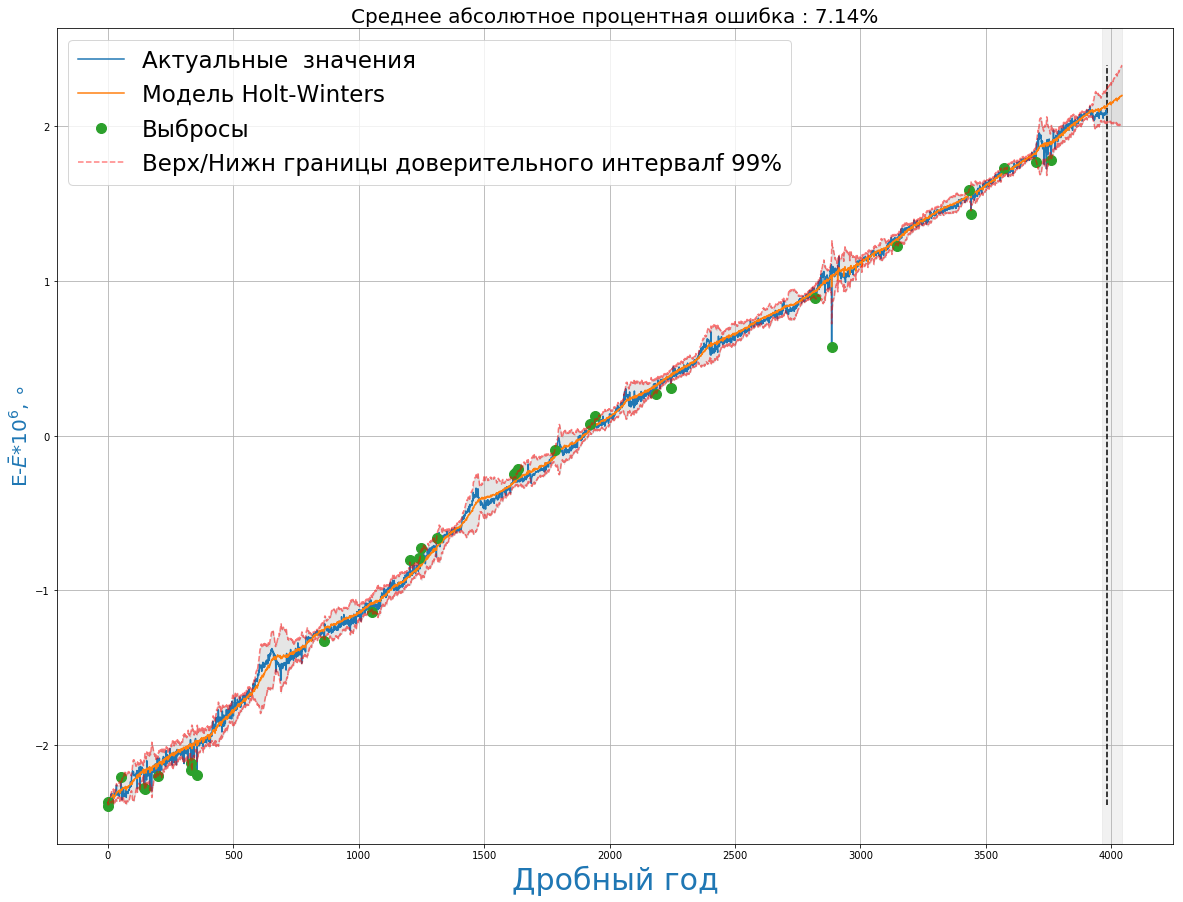

In [433]:

plotHoltWinters(iatcut2.N)

In [434]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit # you have everything done for you
from sklearn.model_selection import cross_val_score


%matplotlib inline

In [435]:
data = pd.read_csv('iat3_lon_sred.txt', index_col=['Time'], parse_dates=['Time'])
#data = pd.read_csv('iat3_X.txt', index_col=['Time'], parse_dates=['Time'])
#data = pd.read_csv('iv16_X.txt', index_col=['Time'], parse_dates=['Time'])
#data.head()

In [436]:
# Adding the lag of the target variable from 6 steps back up to 24
for i in range(5, 60):
    data["lag_{}".format(i)] = data.N.shift(i)
    

In [437]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [438]:
def mean_absolute_error_ol(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred) )

In [439]:
def timeseries_train_test_split(X, y, test_size):
    """
        Сюда заносим х у и размер тестовой выборки
    """
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))   #          1-03 = 07*дину Х
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [440]:
y = data.dropna().N
X = data.dropna().drop(['N'], axis=1)# убираем из фрэйма y
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)
#prognoz = pd.concat(X_train,X_test)
#X


In [441]:
%%time
lr = LinearRegression()
lr.fit(X_train, y_train)


Wall time: 18 ms


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [442]:
tscv = TimeSeriesSplit(n_splits=5)

In [443]:
def plotModelResults(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    
    plt.figure(figsize=(15, 7))
    plt.plot(y_test.values,"c", label="Исходные данные", linewidth=2.0)
    plt.plot(prediction, "r", label="Предсказанные данные", linewidth=2.0)
    plt.ylabel(r'E-$\bar E$*$10^6$, $\circ$', {'color': 'C0', 'fontsize': 20})
    #plt.ylabel(r"10^+6$^\circ$  e^{-5 t_i/\tau} " , {'color': 'C0', 'fontsize': 20})
    #r'$\alpha > \beta$'
    plt.xlabel(r'порядковый количество дней', {'color': 'C0', 'fontsize': 20})      
   
    if plot_intervals:
        # проверка качества разбивки на обучении
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, # как разбивать
                                    scoring="neg_mean_absolute_error") # rfre. vtnhbre bcgjkmpjdfnm
        mae = cv.mean() * (-1) # делает знак +   и это среднее а не мае
        print('cv mean ', mae)
        #print(cv)          #[-0.00433343 -0.00419828 -0.00417822]
        deviation = cv.std()
        
        #scale = 1.96
        scale = 3
        #print('pred',prediction,'- mae',mae, '+ 1.96 * std',deviation)
        #print('\n')
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="верх/ ниж границы доверительного интервала 99%", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Выбросы")
    
    #error = mean_absolute_error_ol(prediction, y_test)
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Средняя обсалютная процентная ошибка {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

cv mean  0.01783591797596971


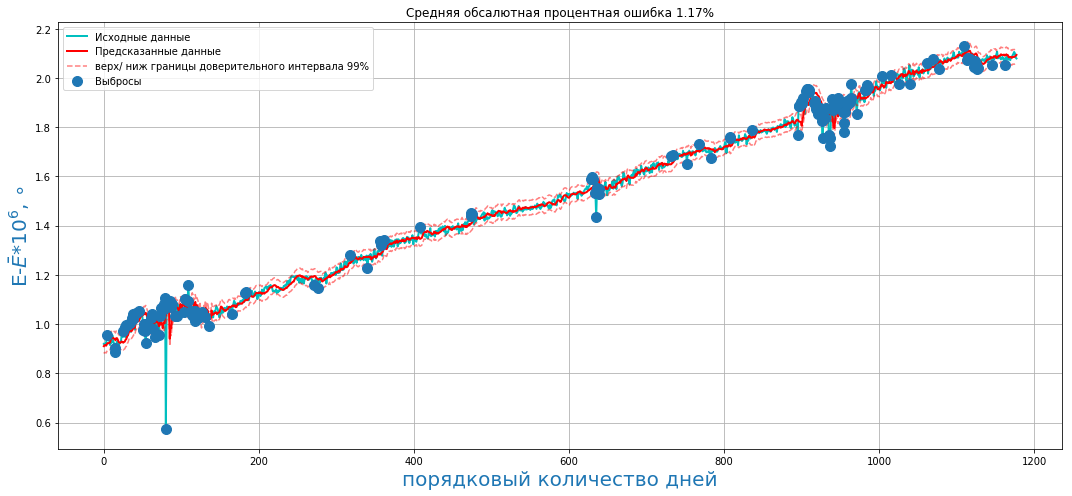

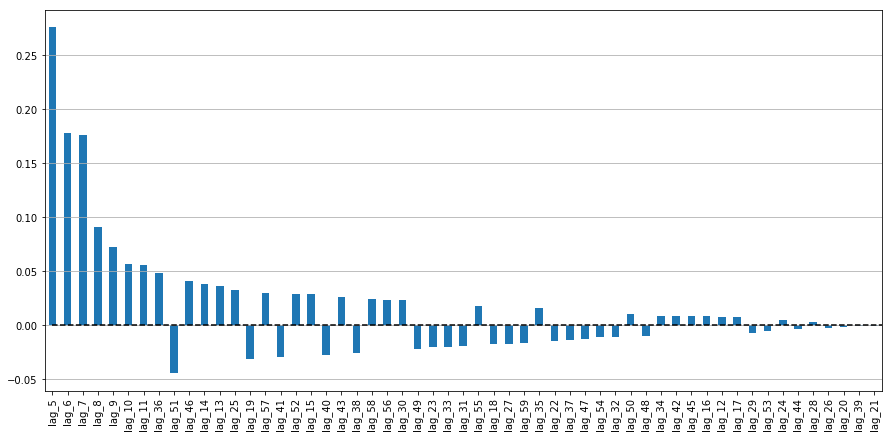

In [444]:
plotModelResults(lr, plot_intervals=True,plot_anomalies=True)
plotCoefficients(lr)

### Linear reg

In [445]:
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [446]:
data = pd.read_csv('iat3_lon_sred.txt', index_col=['Time'], parse_dates=['Time'])
#data = pd.read_csv('iat3_Y.txt', index_col=['Time'], parse_dates=['Time'])
#data = pd.read_csv('iV16_X_n_t.txt', index_col=['Time'], parse_dates=['Time'])

def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, в котором ключи уникальны
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [447]:
def prepareData(series, lag_start, lag_end, test_size, target_encoding=False):

    
    # copy of the initial dataset
    data = pd.DataFrame(series.copy())
    data.columns = ["N"]
    
    # lags of series
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.N.shift(i)
    
    # datetime features
    data.index = pd.to_datetime(data.index)
    data["hour"] = data.index.hour
    data["weekday"] = data.index.weekday
    data['is_weekday'] = data.weekday.isin([5,6])*1
    
    if target_encoding:
        # calculate averages on train set only
        test_index = int(len(data.dropna())*(1-test_size))
        #data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "N").get, data.weekday))
        #data["hour_average"] = list(map(code_mean(data[:test_index], 'hour', "N").get, data.hour))
        #data["is_weekday_average"] = list(map(code_mean(data[:test_index], 'is_weekday', "N").get, data.is_weekday))

        # frop encoded variables 
        data.drop(["hour", "weekday",'is_weekday'], axis=1, inplace=True)
    
    # train-test split
    y = data.dropna().N
    X = data.dropna().drop(['N'], axis=1)
    X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=test_size)

    return X_train, X_test, y_train, y_test

In [448]:
def plotModelResults2(model, X_train=X_train, X_test=X_test, plot_intervals=False, plot_anomalies=False):
    """
        Plots modelled vs fact values, prediction intervals and anomalies
    
    """
    
    prediction = model.predict(X_test)
    
    
    plt.figure(figsize=(15, 7))
    plt.plot(y_test.values,"c", label="Исходные данные", linewidth=2.0)
    plt.plot(prediction, "r", label="Предсказанные значения", linewidth=2.0)
    plt.ylabel(r'E-$\bar E$*$10^6$, $\circ$', {'color': 'C0', 'fontsize': 20})
    plt.xlabel(r'порядковое количество дней', {'color': 'C0', 'fontsize': 20})      
   
    if plot_intervals:
        # проверка качества разбивки на обучении
        cv = cross_val_score(model, X_train, y_train, 
                                    cv=tscv, # как разбивать
                                    scoring="neg_mean_absolute_error") # rfre. vtnhbre bcgjkmpjdfnm
        mae = cv.mean() * (-1) # делает знак +   и это среднее а не мае
        print('cv mean ', mae)
        #print(cv)          #[-0.00433343 -0.00419828 -0.00417822]
        deviation = cv.std()
        
        #scale = 1.96
        scale = 3
        #print('pred',prediction,'- mae',mae, '+ 1.96 * std',deviation)
        #print('\n')
        lower = prediction - (mae + scale * deviation)
        upper = prediction + (mae + scale * deviation)
        
        plt.plot(lower, "r--", label="верхн/ нижни границы доверительного интервала 99%", alpha=0.5)
        plt.plot(upper, "r--", alpha=0.5)
        
        if plot_anomalies:
            anomalies = np.array([np.NaN]*len(y_test))
            anomalies[y_test<lower] = y_test[y_test<lower]
            anomalies[y_test>upper] = y_test[y_test>upper]
            plt.plot(anomalies, "o", markersize=10, label = "Выбросы")
    
    error = mean_absolute_percentage_error(prediction, y_test)
    plt.title("Средняя ошибка в % {0:.2f}%".format(error))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
def plotCoefficients(model):
    """
        Plots sorted coefficient values of the model
    """
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    
    plt.figure(figsize=(15, 7))
    coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(coefs), linestyles='dashed');

cv mean  0.030275918161470756


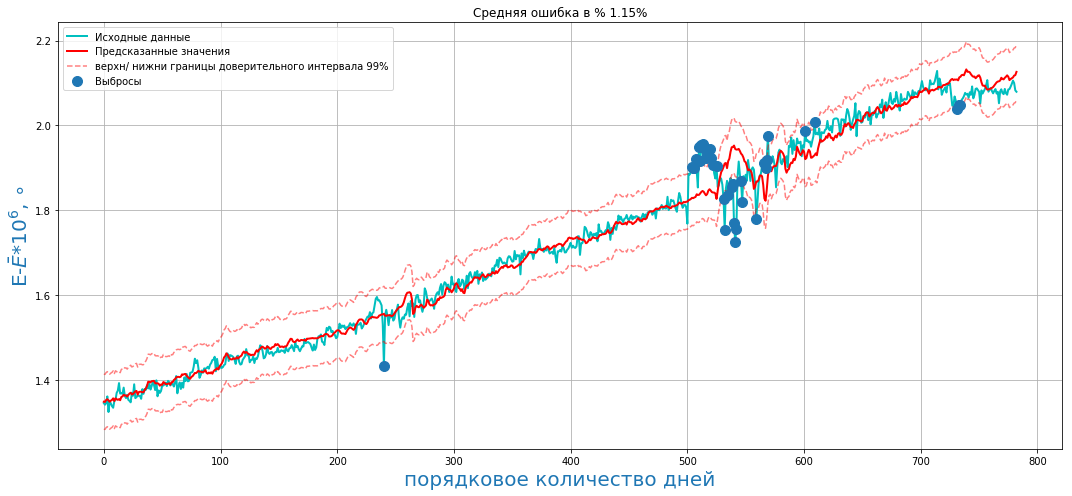

In [449]:
X_train, X_test, y_train, y_test = prepareData(data, lag_start=25, lag_end=70, test_size=0.2, target_encoding=True)
#X_train, X_test, y_train, y_test = prepareData(data, lag_start=10, lag_end=30, test_size=0.3, target_encoding=True)
#X_train_iat3, X_test_iat3, y_train_iat3, y_test_iat3 = prepareData(iat3, lag_start=4, lag_end=48, test_size=0.1, target_encoding=True)
#print(X_train)
X_train_test = pd.concat([X_train, X_test])
y_train_test = pd.concat([y_train, y_test])

#y_train_test_iat3 = pd.concat([y_train_iat3, y_test_iat3])
#X_iat3_train_scaler = scaler.transform(X_train_iat3)
#X_iat3_test_scaler = scaler.transform(X_test_iat3)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_train_scaled = scaler.transform(X_train_test)
#y_test_train_scaled = scaler.transform(y_train_test)

#X_df = scaler.transform(X_train_test_iat3)

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
predict2 = lr.predict(X_test_train_scaled)
#print(len(prediction2))
#lr.fit(X_iat3_train_scaler, y_train_iat3)
#prediction = lr.predict(X_df)
#plt.figure(figsize=(15, 7))
#plt.plot(y_df.values,"c", label="actual", linewidth=2.0)
#plt.plot(prediction, "r", label="prediction", linewidth=2.0)
#mae_sum = 0
#for sale, x in zip(y_train_test_iat3, X_df):
#    prediction = lr.predict(X_df)
#    #print(prediction)
#    mae_sum += abs(sale - prediction)
#    mae = mae_sum / len(y_train_test_iat3)
    #print(mae)
#plotModelResults(lr, X_train=X_iat3_train_scaler, X_test=X_iat3_test_scaler, plot_intervals=True, plot_anomalies=True)

plotModelResults2(lr, X_train=X_train_scaled, X_test=X_test_scaled, plot_intervals=True, plot_anomalies=True)
#plotCoefficients(lr)

3914
mae 0.025269014584619
std [-2.27257471 -2.27338702 -2.27952627 ...  2.11761341  2.11856311
  2.12626328]
size [-2.27257471 -2.27338702 -2.27952627 ...  2.11761341  2.11856311
  2.12626328]
deviation 0.03547641221176317


<Figure size 432x288 with 0 Axes>

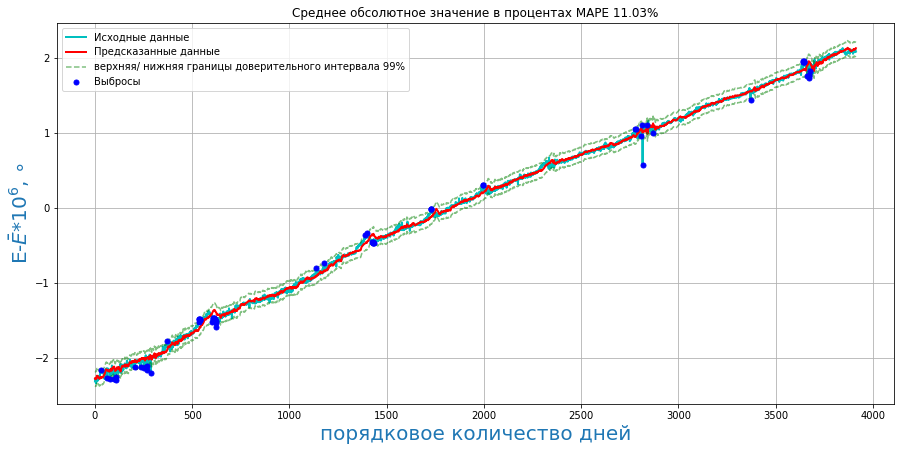

In [452]:
plt.clf()
plt.figure(figsize=(15, 7))
print(len(predict2))
mae = mean_absolute_error(y_train_test, predict2)
print('mae',mae)
mean_predic = predict2.mean()
#print('mean', mean_x)
std_predic = predict2.std()
print('std',predict2)
size_predict = len(predict2)
print('size',predict2)

deviation = np.std(y_train_test - predict2)
print('deviation', deviation)
upper = predict2 + (mae + 2 * deviation)#
lower = predict2 - (mae + 2 * deviation)#

plt.plot(y_train_test.values,"c", label="Исходные данные", linewidth=2.0)#
plt.plot(predict2, "r", label="Предсказанные данные", linewidth=2.0)#
plt.ylabel(r'E-$\bar E$*$10^6$, $\circ$', {'color': 'C0', 'fontsize': 20})
plt.xlabel(r'порядковое количество дней', {'color': 'C0', 'fontsize': 20})      
plt.plot(lower, "g--", label="верхняя/ нижняя границы доверительного интервала 99%", alpha=0.5)#
plt.plot(upper, "g--", alpha=0.5)#
Anomalies = np.array([np.NaN]*len(y_train_test)) # пустой массив
Anomalies[y_train_test>upper] = y_train_test[y_train_test>upper]
Anomalies[y_train_test<lower] = y_train_test[y_train_test<lower]
plt.plot(Anomalies, "bo", markersize=5,label = "Выбросы")
error = mean_absolute_percentage_error(predict2, y_train_test)
plt.title("Среднее обсолютное значение в процентах MAPE {0:.2f}%".format(error))
plt.legend(loc="best")
plt.grid(True)#
plt.legend()#
#dtest.head()     


cv mean  0.03045014350597309
Wall time: 470 ms


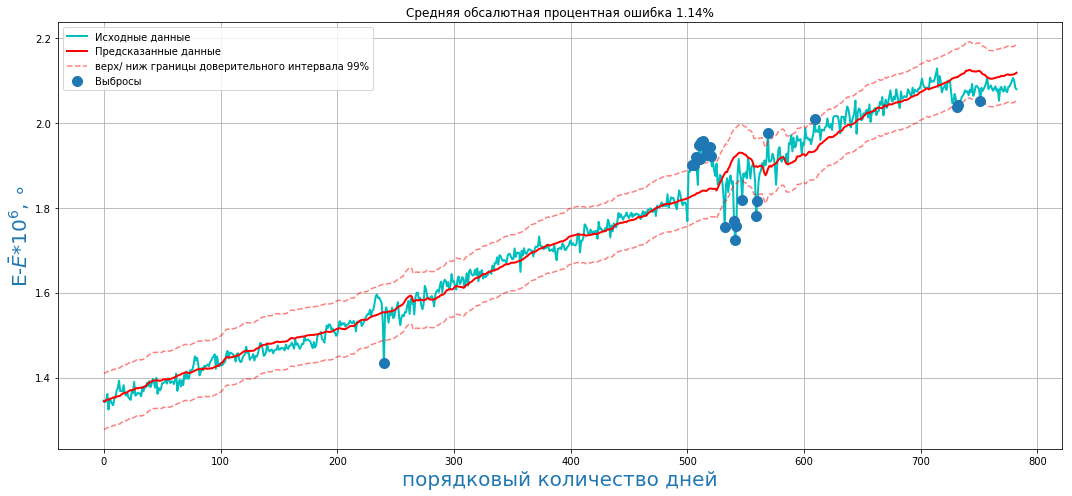

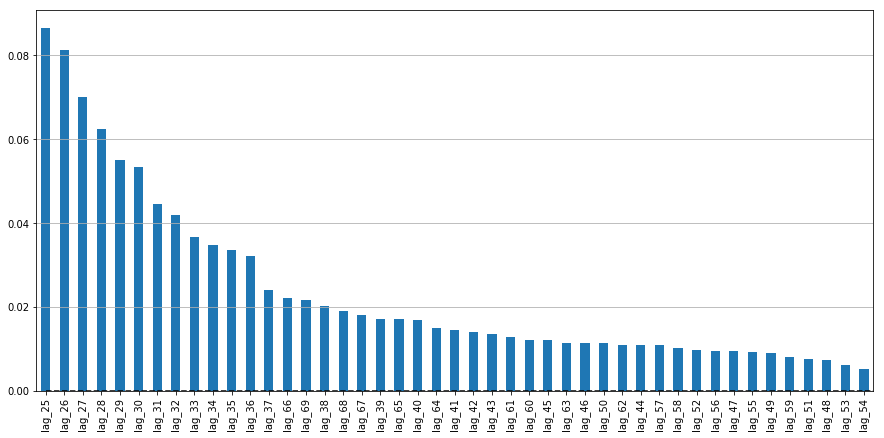

In [453]:
%%time
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)

plotModelResults(ridge, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(ridge)

3914
mae 0.02603410534050577
std [-2.27257471 -2.27338702 -2.27952627 ...  2.11761341  2.11856311
  2.12626328]
size [-2.26716526 -2.26717846 -2.26823458 ...  2.11493993  2.11603398
  2.11822105]
deviation 0.03616325120934887
Wall time: 89 ms


<Figure size 432x288 with 0 Axes>

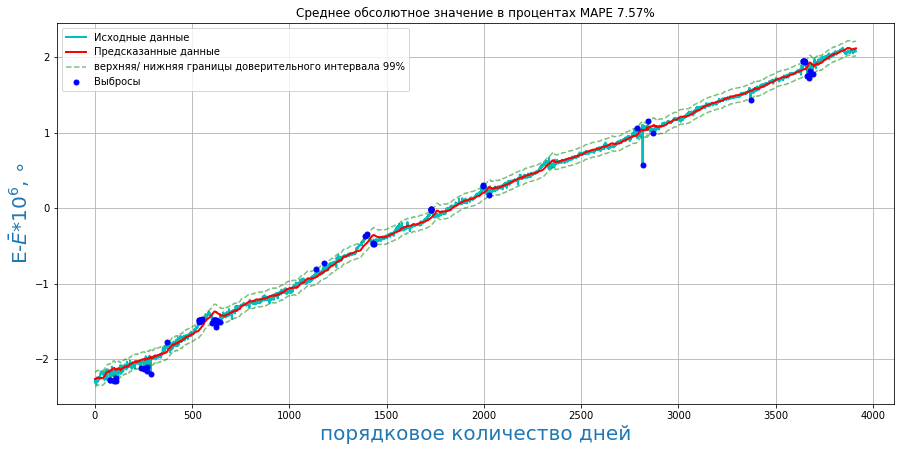

In [461]:
%%time
ridge = RidgeCV(cv=tscv)
ridge.fit(X_train_scaled, y_train)
predictRidge = ridge.predict(X_test_train_scaled)

plt.clf()
plt.figure(figsize=(15, 7))
print(len(predict2))
mae = mean_absolute_error(y_train_test, predictRidge)
print('mae',mae)
mean_predic = predictRidge.mean()
#print('mean', mean_x)
std_predic = predictRidge.std()
print('std',predict2)
size_predict = len(predictRidge)
print('size',predictRidge)

deviation = np.std(y_train_test - predictRidge)
print('deviation', deviation)
upper = predictRidge + (mae + 1.96 * deviation)#
lower = predictRidge - (mae + 1.96 * deviation)#

plt.plot(y_train_test.values,"c", label="Исходные данные", linewidth=2.0)#
plt.plot(predictRidge, "r", label="Предсказанные данные", linewidth=2.0)#
plt.ylabel(r'E-$\bar E$*$10^6$, $\circ$', {'color': 'C0', 'fontsize': 20})
plt.xlabel(r'порядковое количество дней', {'color': 'C0', 'fontsize': 20})      
plt.plot(lower, "g--", label="верхняя/ нижняя границы доверительного интервала 99%", alpha=0.5)#
plt.plot(upper, "g--", alpha=0.5)#
Anomalies = np.array([np.NaN]*len(y_train_test)) # пустой массив
Anomalies[y_train_test>upper] = y_train_test[y_train_test>upper]
Anomalies[y_train_test<lower] = y_train_test[y_train_test<lower]
plt.plot(Anomalies, "bo", markersize=5,label = "Выбросы")
error = mean_absolute_percentage_error(predictRidge, y_train_test)
plt.title("Среднее обсолютное значение в процентах MAPE {0:.2f}%".format(error))
plt.legend(loc="best")
plt.grid(True)#
plt.legend()#
#dtest.head()     
#lr = LinearRegression()
#lr.fit(X_train_scaled, y_train)
#predictRidge = ridge.predict(X_test_train_scaled)

cv mean  0.029277959890416642
Wall time: 1.01 s


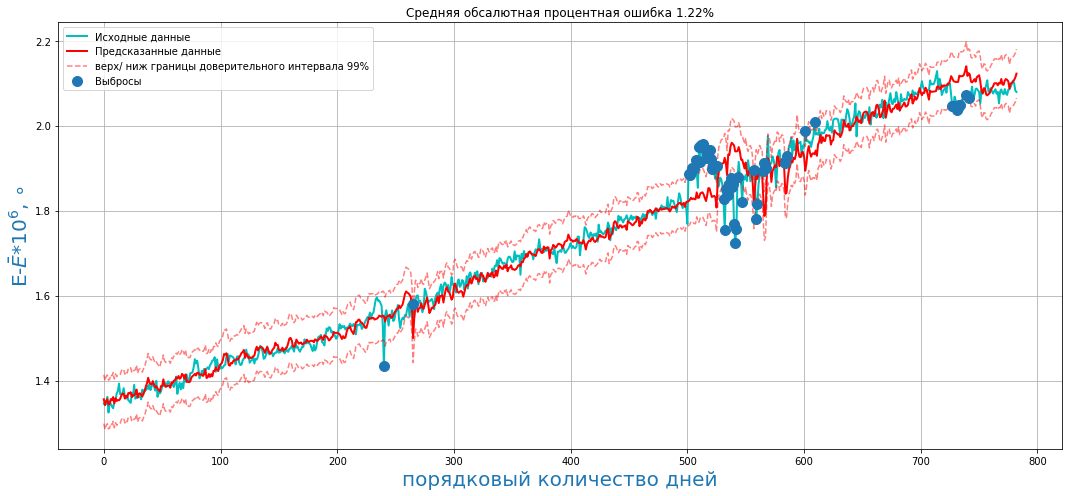

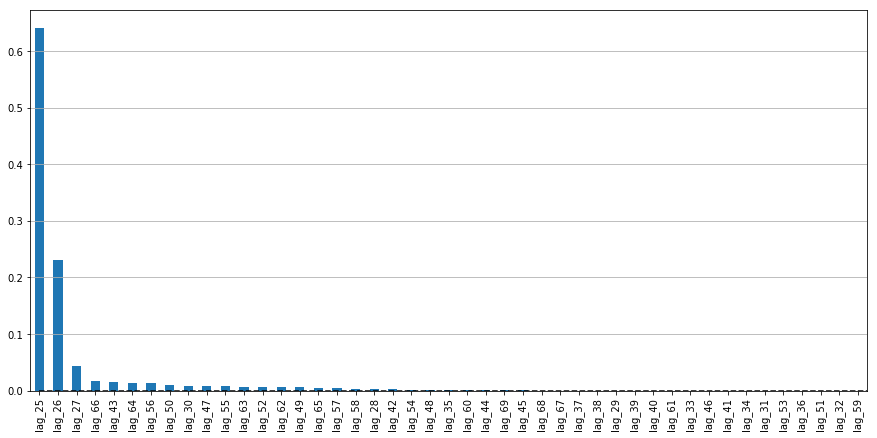

In [462]:
%%time
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)
#lasso.predict(X_train_scaled)
predict3 = lr.predict(X_test_train_scaled)

plotModelResults(lasso, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)
plotCoefficients(lasso)

3914
mae 0.025269014584619
std [-2.27257471 -2.27338702 -2.27952627 ...  2.11761341  2.11856311
  2.12626328]
size [-2.27257471 -2.27338702 -2.27952627 ...  2.11761341  2.11856311
  2.12626328]
deviation 0.03547641221176317


<Figure size 432x288 with 0 Axes>

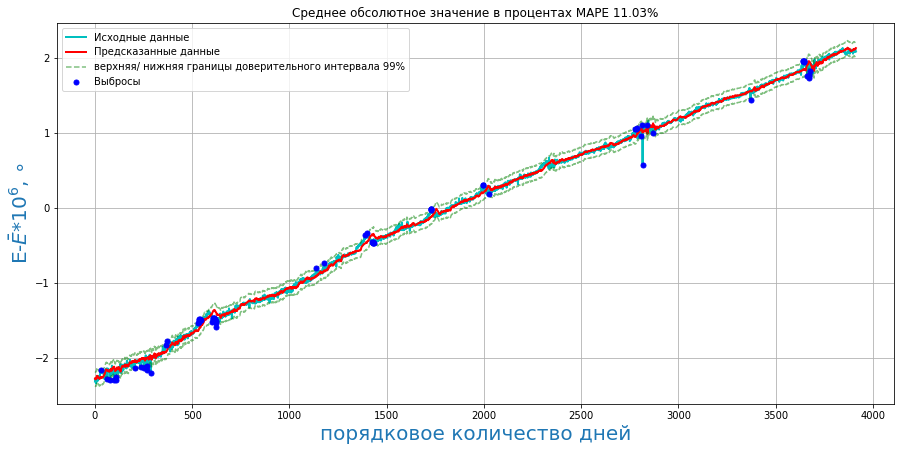

In [463]:
##### %%time
lasso = LassoCV(cv=tscv)
lasso.fit(X_train_scaled, y_train)
#lasso.predict(X_train_scaled)
predicLasso = lr.predict(X_test_train_scaled)

plt.clf()
plt.figure(figsize=(15, 7))
print(len(predict2))
mae = mean_absolute_error(y_train_test, predicLasso)
print('mae',mae)
mean_predic = predicLasso.mean()
#print('mean', mean_x)
std_predic = predicLasso.std()
print('std',predicLasso)
size_predict = len(predicLasso)
print('size',predicLasso)

deviation = np.std(y_train_test - predicLasso)
print('deviation', deviation)
upper = predicLasso + (mae + 1.96 * deviation)#
lower = predicLasso - (mae + 1.96 * deviation)#

plt.plot(y_train_test.values,"c", label="Исходные данные", linewidth=2.0)#
plt.plot(predicLasso, "r", label="Предсказанные данные", linewidth=2.0)#
plt.ylabel(r'E-$\bar E$*$10^6$, $\circ$', {'color': 'C0', 'fontsize': 20})
plt.xlabel(r'порядковое количество дней', {'color': 'C0', 'fontsize': 20})      
plt.plot(lower, "g--", label="верхняя/ нижняя границы доверительного интервала 99%", alpha=0.5)#
plt.plot(upper, "g--", alpha=0.5)#
Anomalies = np.array([np.NaN]*len(y_train_test)) # пустой массив
Anomalies[y_train_test>upper] = y_train_test[y_train_test>upper]
Anomalies[y_train_test<lower] = y_train_test[y_train_test<lower]
plt.plot(Anomalies, "bo", markersize=5,label = "Выбросы")
error = mean_absolute_percentage_error(predicLasso, y_train_test)
#error = mean_absolute_error_ol(predicLasso, y_train_test)
plt.title("Среднее обсолютное значение в процентах MAPE {0:.2f}%".format(error))
plt.legend(loc="best")
plt.grid(True)#
plt.legend()#
#dtest.head()     
#lr = LinearRegression()
#lr.fit(X_train_scaled, y_train)
#predictRidge = ridge.predict(X_test_train_scaled)

3914
mae 0.025269014584619
std [-2.27257471 -2.27338702 -2.27952627 ...  2.11761341  2.11856311
  2.12626328]
size [-2.27257471 -2.27338702 -2.27952627 ...  2.11761341  2.11856311
  2.12626328]
deviation 0.03547641221176317


<Figure size 432x288 with 0 Axes>

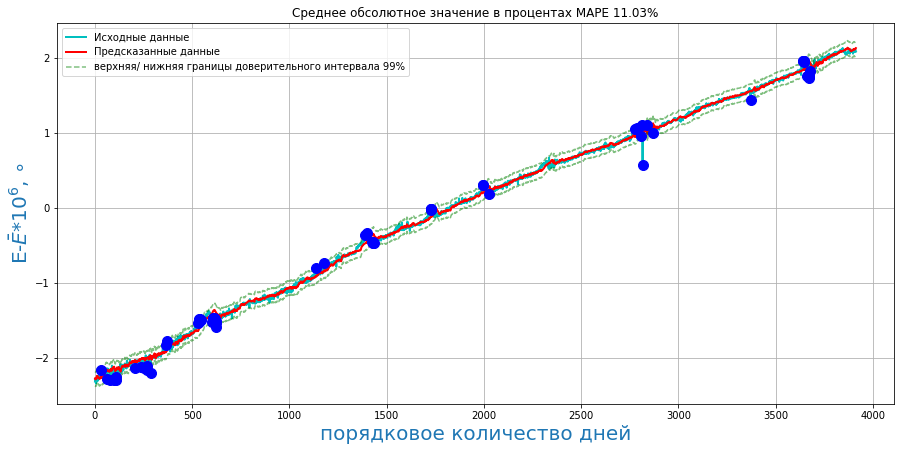

In [460]:
plt.clf()
plt.figure(figsize=(15, 7))
print(len(predict3))
mae = mean_absolute_error(y_train_test, predict3)
print('mae',mae)
mean_predic = predict3.mean()
#print('mean', mean_x)
std_predic = predict3.std()
print('std',predict3)
size_predict = len(predict3)
print('size',predict3)

deviation = np.std(y_train_test - predict3)
print('deviation', deviation)
upper = predict3 + (mae + 1.96 * deviation)#
lower = predict3 - (mae + 1.96 * deviation)#

plt.plot(y_train_test.values,"c", label="Исходные данные", linewidth=2.0)#
plt.plot(predict3, "r", label="Предсказанные данные", linewidth=2.0)#
plt.ylabel(r'E-$\bar E$*$10^6$, $\circ$', {'color': 'C0', 'fontsize': 20})
plt.xlabel(r'порядковое количество дней', {'color': 'C0', 'fontsize': 20})      
plt.plot(lower, "g--", label="верхняя/ нижняя границы доверительного интервала 99%", alpha=0.5)#
plt.plot(upper, "g--", alpha=0.5)#
Anomalies = np.array([np.NaN]*len(y_train_test)) # пустой массив
Anomalies[y_train_test>upper] = y_train_test[y_train_test>upper]
Anomalies[y_train_test<lower] = y_train_test[y_train_test<lower]
plt.plot(Anomalies, "bo", markersize=10)
error = mean_absolute_percentage_error(predict3, y_train_test)
plt.title("Среднее обсолютное значение в процентах MAPE {0:.2f}%".format(error))
plt.legend(loc="best")
plt.grid(True)#
plt.legend()#
#dtest.head()     

### XGBOOST

In [330]:
from xgboost import XGBRegressor 

xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)



XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

cv mean  0.29131212302002685


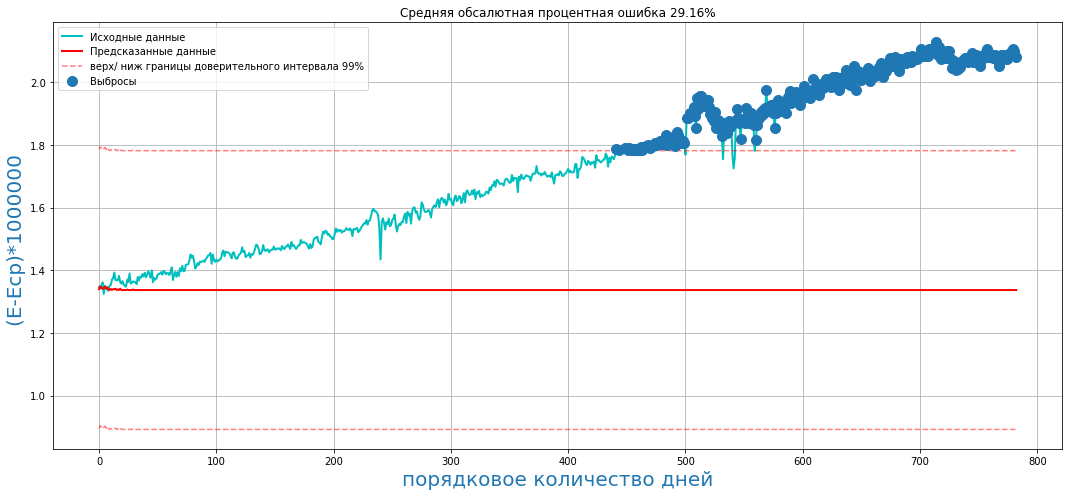

In [331]:
plotModelResults(xgb, 
                 X_train=X_train_scaled, 
                 X_test=X_test_scaled, 
                 plot_intervals=True, plot_anomalies=True)